<P align="right"> Andrew Koren </P>

# Mth 416 H3 

## Exercise 1

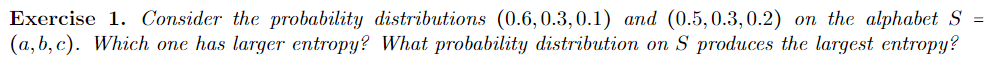

Entropy is defined as

$$
H_b(p) \colonequals \sum_{s\in S} p_s \log_b\left(\frac{1}{p_s}\right) \\
$$

Since no base is stated, we'll assume $b=2$ 

In [1]:
from math import log

first_p = (0.6, 0.3, 0.1)
second_p = (0.5, 0.3, 0.2)
base = 2

def get_entropy(probabilites, base):
    entropy = sum([
        p*log(1/p, base) for p in probabilites
        ])
    return entropy

print(get_entropy(first_p, base))
print(get_entropy(second_p, base))

1.295461844238322
1.4854752972273344


The second probability distribution has higher entropy ($1.49$ vs $1.30$). According to theorem $3.4.2$, we have $H_b(p) \leq \log_b m$ where $m = |S|$, with equality when $p$ is an equal distribution $(1/3, 1/3, 1/3)$. Thus the maximum entropy is $\log_2(3) = 1.58$

In [2]:
log(3, 2)

1.5849625007211563

## Exercise 2

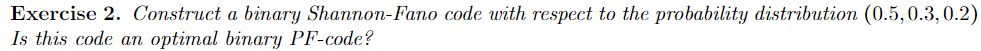

For the Shannon-Fano code,

$y_s=\left\lceil \log_b \frac{1}{p_s} \right\rceil$

For the distribution $(0.5, 0.3, 0.2)$, the SF code yeilds the lengths $(1, 2, 3)$

In [10]:
from math import ceil

print([ceil(log(1/p, 2)) for p in second_p])

[1, 2, 3]


This can be mapped to the binary values [0, 10, 110]. We can check if it is optimal by checking if it is equivalent to the huffman code (same $\sum_i p_iy_i$). We make the huffman code below.

In [4]:
from other_code import make_huffman, path_to_binary

huffman, path = make_huffman(second_p)
print(huffman)
path_to_binary(path, second_p)

[[0.5 0.3 0.2]
 [0.5 0.5 0. ]
 [0.  1.  0. ]]


array([['0.5', '0'],
       ['0.3', '11'],
       ['0.2', '10']], dtype='<U32')

The first matrix shows the tree method used to create the huffman code, and the second shows what codeword each probability is mapped to using the tree method. Since the huffman code is optimal and the SF code is the same with one codeword being one symbol longer, it is longer than an optimal code and thus not optimal.

## Exercise 3

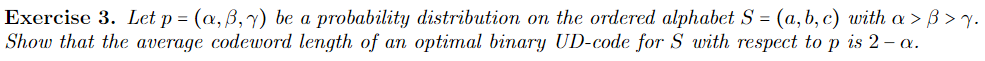

By running the Huffman code algorithm on this code we can find the average codeword length of the Huffman code, which is an optimal binary UD code.

$$
\begin{bmatrix}
\alpha & \beta & \gamma \\
\alpha & \beta + \gamma & 0 \\
0 & \alpha + \beta + \gamma & 0 \\
\end{bmatrix}
$$
Where $\alpha + \beta + \gamma = 1$. <br> This yields $\alpha \rightarrow 0, \beta \rightarrow 10, \gamma \rightarrow 11$. 

Thus we can find the average codeword length $L$:
$$
L = \alpha*1 + \beta*2 + \gamma*2 \\
= \alpha + 2(\beta + \gamma) = \alpha + 2(1-\alpha) = \alpha + 2-2\alpha = 2-\alpha
$$
Thus the average codeword length is confirmed.

## Exercise 4

We can use our algorithm from class to find the huffman code

In [6]:
from other_code import make_huffman, path_to_binary

weights = (0.4, 0.3, 0.1, 0.1, 0.06, 0.04)

huffman_reduction, path = make_huffman(weights)

#shows the steps
print(huffman_reduction)
print(path)

path_to_binary(path, weights)

[[0.4  0.3  0.1  0.1  0.06 0.04]
 [0.4  0.3  0.1  0.1  0.1  0.  ]
 [0.4  0.3  0.   0.2  0.1  0.  ]
 [0.4  0.3  0.   0.3  0.   0.  ]
 [0.4  0.   0.   0.6  0.   0.  ]
 [0.   0.   0.   1.   0.   0.  ]]
[(5, 4), (2, 3), (4, 3), (1, 3), (0, 3)]


array([['0.4', '0'],
       ['0.3', '10'],
       ['0.1', '1110'],
       ['0.1', '1111'],
       ['0.06', '1101'],
       ['0.04', '1100']], dtype='<U32')

The array above shows the reduction used to create the Huffman code, and the reduction path is used to make the corresponding optimal code.

## Execise 5

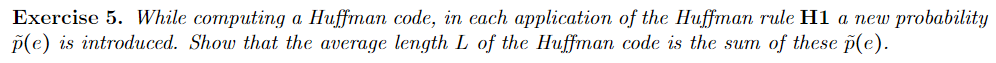

Example: $L(0.5, 0.3, 0.2) = 0.5 * 1 + 0.3 *2 + 0.2 *2 = 1.5\rightarrow \tilde p(e)_1 = + \tilde p(e)_2 = 0.5 + 1 = 1.5$

Proof:

Applying $\bold{H1}$ combines two codewords of length $l$ and probability $p_d$ and $p_e$ into one of length $l-1$ and probability $p_d+p_e$. This changes $L$ to $L'$ by

$$L = a + l*(p_e+p_d) \rightarrow L' = a + (l-1)(p_e+p_d) = L - (p_e+p_d) = L - \tilde p(e)$$
where $a$ represents all unaffected terms. Note that $p_e + p_d = \tilde p(e)$. After $|p|-1$ iterations, where $|p|$ is the number of probabilities in the distribution, there is only one probability left $\tilde p(e) = 1$, where the only codeword left is the emptyset, $L= 1*0=0$. 

As such, $\bold{H1}$ iteratively subtracts $\tilde p(e)$ from $L$ until $L=0$ to create the Huffman code. In reverse, this is the same as $$\sum_i \tilde p_i(e) = L$$ for each $\tilde p_i(e)$ introduced by application of the Huffman rule $\bold{H1}$



<!-- PFor a probability distribution of with $|p|$ entries, we show that $L = \sum_{i=1}^{|p|} \tilde p_i$ where each $\tilde p_i$ is a new probability formed by $\bold{H1}$

$$
L = p_1 y_1 + p_2 y_2 + \dots + p_{|p|} y_{|p|}
$$

For $|p| = 2$ this is trivial, since $y_i = 1$

$$
p = (\alpha, \beta)
L = \alpha * 1 + \beta *1 = 1\\
\tilde p = \alpha + \beta = 1
$$ -->

<!-- 
Moving backwards, $\bold{H1}$ splits a probability associated with a codeword length $l$ in two and assigns codewords of length $l+1$ to each. -->



<!-- Proof: average length $L= \sum_i p_i y_i = \sum_i \tilde p(e_i)$, where $e_i$ is the $i$-th iteration of $\bold{H1}$. Using an optimal huffman code for some distribution $p = (p_1, \dots, p_n)$ there is at least one $p_e = \min(p)$ with associated minimum $y_e|e\in{1,\dots n}$. -->



## Exercise 6

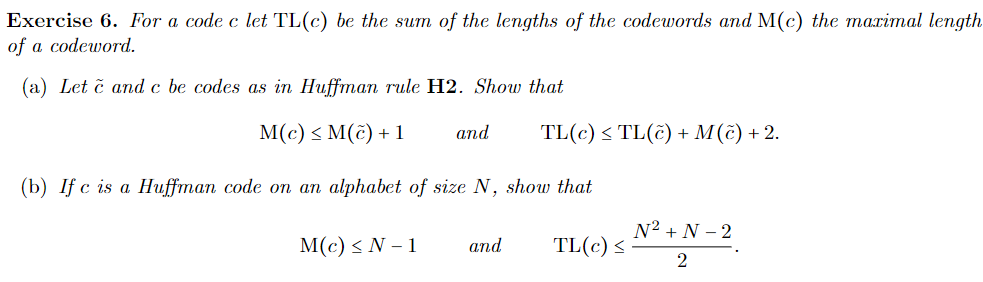

## Exercise 7

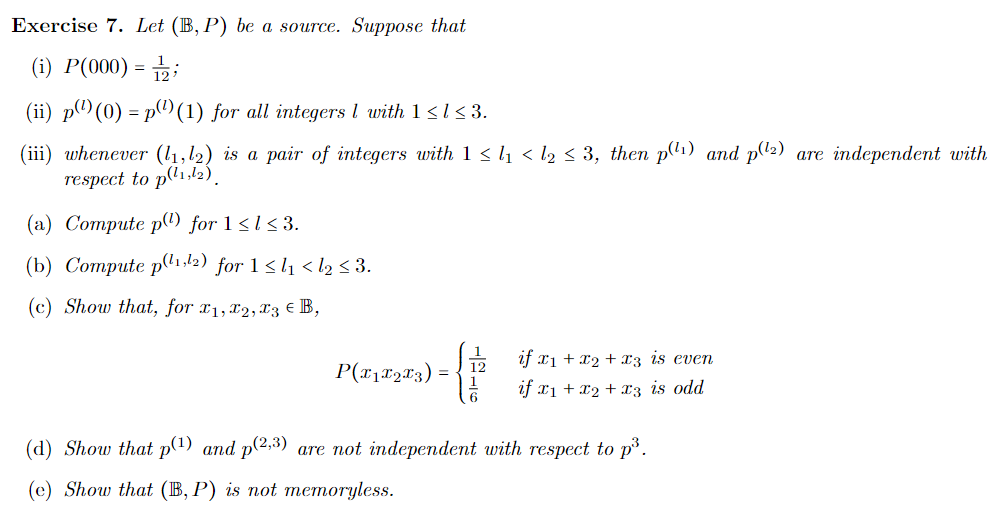

(a) Since $p^{(l)}(0) + p^{(l)}(1) = 1$, (ii) implies $p^{(l)}(0) = p^{(l)}(1) = 0.5$.
$$
2p^{(l)}(0) = 1 \rightarrow p^{(l)}(0)=1/2 \rightarrow p^{(l)}(1) = 1/2
$$

<!-- However, since
$P(000) = \frac{1}{12} \neq 1/2*1/2*1/2 = 1/8$, it's clear;y not memoryless. We'll get there in part (e).
 -->

(b) Independence $\rightarrow p^{(l_1)} \otimes p^{(l_2)} = p^{l_1+l_2} = p^{(l_1, l_2)}$

$$
p^{(l_1)}(0) = p^{(l_1)}(1) = 1/2 \\
p^{(l_2)}(0) = p^{(l_2)}(1) = 1/2 \\
p^{(l_1)}(0) \otimes p^{(l_2)}(0) = 1/2 * 1/2 = 1/4 = p^{(l_1, l_2)}(0,0) \\
p^{(l_1, l_2)}(ab) = 1/4 | ab \in \mathbb{B}^2 
$$

(c) Independence $\rightarrow p^{(1)} \otimes p^{(2,3)} = p^{(1, 2, 3)} = p^3$

Let's show an example where this is false using $P(000)=1/12$.

$$
p^{(1)}(0) = 1/2 \\
p^{(2,3)}(00) = 1/4 \\

p^{(1)} \otimes p^{(2,3)} = 1/8 \neq 1/12 = p^3(000)
$$

As such, 